In [245]:
import numpy as np
import pyspark as ps
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

import matplotlib.pyplot as plt
%matplotlib inline

In [246]:
spark = ps.sql.SparkSession.builder.master('local[4]')\
    .appName('spark-homework4').getOrCreate()

sc = spark.sparkContext

In [247]:
rdd = sc.textFile('fc-barcelona.csv')\
    .map(lambda x: x.split(','))\
    .filter(lambda x: not x[0].startswith('Player'))\
    .map(lambda x: (x[0], int(x[5]) if x[5] else 0))

In [248]:
# Getting players with minimum score
minimum_vales_rdd = rdd.sortBy(lambda score: score[1], ascending=True)
minimum_vales = minimum_vales_rdd.take(1)[0][1]
rdd2 = rdd.filter(lambda x: x[1] == minimum_vales)
rdd2.collect()

[('Sergio Busquets', 0),
 ('Gerard Piqué', 0),
 ('Marc-André ter Stegen', 0),
 ('Samuel Umtiti', 0),
 ('Neto', 0),
 ('Miralem Pjanic', 0),
 ('Carles Aleñá', 0)]

In [249]:
# Getting players with maximum score
maximum_vales_rdd = rdd.sortBy(lambda score: score[1], ascending=False)
maximum_vales = maximum_vales_rdd.take(1)[0][1]
rdd3 = rdd.filter(lambda x: x[1] == maximum_vales)
rdd3.collect()

[('Lionel Messi', 26)]

In [250]:
footballer_goals = rdd.map(lambda x: x[1]).collect()

In [251]:
np.percentile(footballer_goals, 50)  # Median

2.0

In [252]:
np.percentile(footballer_goals, 25)  # Lower quartile

0.0

In [253]:
np.percentile(footballer_goals, 75)  # Upper quartile

3.0

In [254]:
deptColumns = ["players","goals"]
df = rdd.toDF(deptColumns).toPandas()
df = df[df.goals != 0]
df

,players,goals
0,Lionel Messi,26
1,Ansu Fati,4
2,Antoine Griezmann,11
3,Frenkie de Jong,3
4,Jordi Alba,3
5,Ousmane Dembélé,5
6,Sergi Roberto,1
8,Óscar Mingueza,2
9,Philippe Coutinho,2
10,Ronald Araujo,2


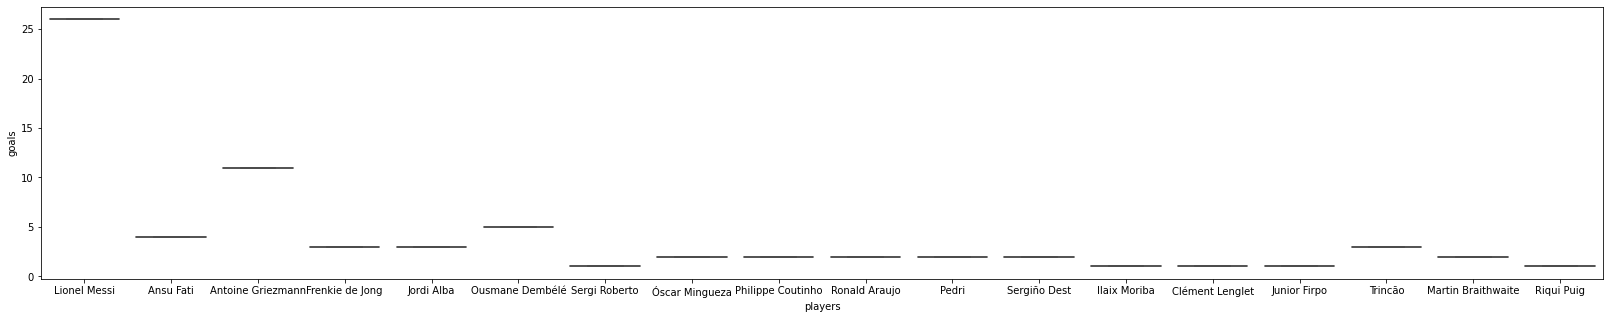

In [255]:
plt.figure(figsize=(28,5))
sns.boxplot(x="players", y="goals", data=df, color='red')
plt.savefig('medals.svg')